Task2 – Beat tracking (Python - notebook *.ipynb)

Use librosa.beat.beat_track to estimate the beat locations and the global tempo:

In [1]:
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display

In [2]:
x, sr = librosa.load('tap_example1.wav')
ipd.Audio(x, rate=sr)

In [3]:
x2, sr2 = librosa.load('tap_example2.wav')
ipd.Audio(x2, rate=sr2)

In [7]:
x3, sr3 = librosa.load('tapexample_3.wav')
ipd.Audio(x3, rate=sr3)

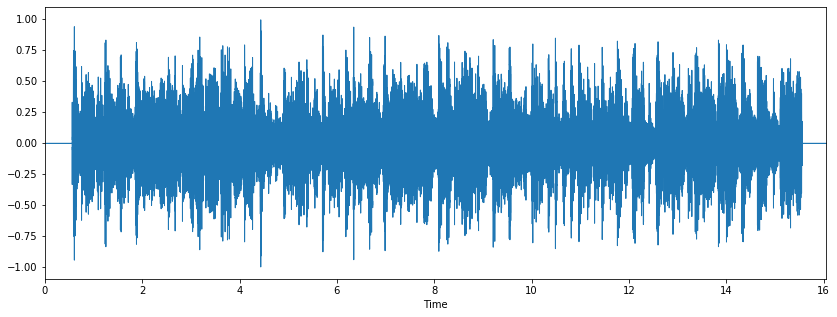

In [8]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr)

In [ ]:
# Track beats using a pre-computed onset envelope
onset_env = librosa.onset.onset_strength(y, sr=sr, aggregate=np.median)
'''
        1. Measure onset strength
        2. Estimate tempo from onset correlation
        3. Pick peaks in onset strength approximately consistent with estimated tempo
'''
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env,sr=sr)

In [ ]:
hop_length = 512
plt.figure(figsize=(8, 4))
times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)
plt.plot(times, librosa.util.normalize(onset_env),label='Onset strength')
plt.vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.legend(frameon=True, framealpha=0.75)
# Limit the plot to a 15-second window
plt.xlim(15, 30)
plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter())
plt.tight_layout()
plt.show()

In [10]:
tempo, beat_times = librosa.beat.beat_track(y=x, sr=sr)
clicks = librosa.clicks(beat_times, sr=sr, length=len(x)) 
ipd.Audio(x + clicks, rate=sr)